In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, rfft, ifft, irfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt

# Read the Excel file
file_path = '04_06.xlsx'
df = pd.read_excel(file_path, header=0)  # header=None if your Excel file has no header row
df_subset_2017_2022 = df.iloc[:,1:]
# Concatenate all rows into a single list
data = df_subset_2017_2022.values.flatten().tolist()# Read the Excel file
data = [100*i for i in data]

In [28]:
n = len(data)
sampling_rate = 24 # It's used as a sample spacing, because 24 hours in a day
frequency_axis = fftfreq(n, d=1.0/sampling_rate)
norm_amplitude = 2/n*np.abs(fft(data))
sampling_rate = 24 # It's used as a sample spacing, because 24 hours in a day
rfft_data = rfft(data)
rfft_freq = rfftfreq(n, d=1.0/sampling_rate)
norm_rfft_amp = 2/n*np.abs(rfft(data))
amparray =2/n*(np.abs(rfft(data)))
phasearray = np.angle(rfft(data) , deg = True)
phasearray = 360 - phasearray
phasearray[phasearray > 360] -= 360
freqarray = 15*rfftfreq(n, d=1/24)
const_rfft_data = np.zeros(np.shape(rfft_data), dtype='complex128') #constructed rfft data array
top_amp = []
top_speed = []
top_phase = []
tmp = np.argpartition(-amparray, 11)
top_indices = tmp[:11]
for i in top_indices:
    top_amp.append(amparray[i])
    top_speed.append(15*rfft_freq[i])
    top_phase.append(phasearray[i])
    const_rfft_data[i] = rfft_data[i]
pred_tide = irfft(const_rfft_data, n)

In [29]:
#data = irfft(const_rfft_data) #data contains 2017 to 2018
dft_data = fft(data)
const_tide_data = np.zeros(2*np.shape(dft_data)[0], dtype='complex128')
N = len(dft_data)
M = N+8760 #One year prediction
for k in range(0, M):
    for n in range(0, N):
        const_tide_data[k] += dft_data[n]*(np.exp(1j * 2*np.pi * n * k / N))*(1/N)

/home/nawabsahab/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/nawabsahab/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


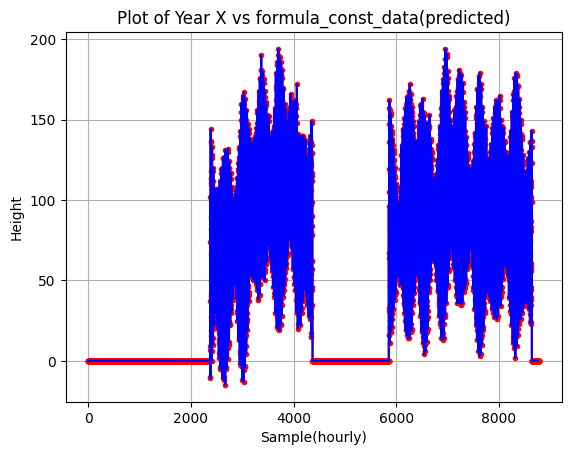

In [22]:
predicted_values = const_tide_data[N:M]
plt.plot(data, marker='.', linestyle='-', color='red')
plt.title('Plot of Year X vs formula_const_data(predicted)')
plt.xlabel('Sample(hourly)')
plt.ylabel('Height')
plt.grid(True)
plt.plot(predicted_values, color = 'blue')
plt.show()

In [23]:
file_path = '2007.xlsx'
df = pd.read_excel(file_path, header=0)  # header=None if your Excel file has no header row
df_subset_2022 = df.iloc[:,1:]
# Concatenate all rows into a single list
data_2022 = df_subset_2022.values.flatten().tolist()# Read the Excel file
data_2022 = [100*i for i in data_2022]

In [24]:
combined_data = np.concatenate([data, predicted_values])

In [25]:
for i in range(0,len(data_2022)):
    if data_2022[i]==0:
        data_2022[i] = predicted_values[i]
combined_data = np.concatenate([data, data_2022])

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
combined_data = combined_data.real
# Assuming combined_data is a list or array with 26280 values
combined_data = np.where(np.abs(combined_data) > 200, combined_data / 100, combined_data)
# Generate the dates for each day from 2017-01-01
start_date = datetime(2004, 1, 1)
num_days = len(combined_data) // 24
dates = [start_date + timedelta(days=i) for i in range(num_days)]

# Reshape the combined_data into 24 columns per day
reshaped_data = combined_data.reshape((num_days, 24))

# Create a DataFrame with the correct format
df = pd.DataFrame(reshaped_data, columns=[str(i+1) for i in range(24)])
df.insert(0, 'Date', [date.strftime('%Y-%m-%d') for date in dates])

# Write the DataFrame to an Excel file
output_file_path = '04_07.xlsx'
df.to_excel(output_file_path, index=False)
